In [6]:
import jieba
import re
import jieba.analyse
import math
# importing pandas library
import pandas as pd
# importing matplotlib library
import matplotlib.pyplot as plt
from collections import Counter
# encoding=utf-8
def scan():
    r = '[’!"#$%&\'()*+,-./:;<=>[email protected][\\]^_`{|}~]+'
    text = open('hw1-dataset.txt','r',encoding = 'utf-8')
    word=" "
    for line in text:
        line = line.strip('\n')
        line = re.sub(r, ' ', line)
        seg_list = jieba.cut(line, cut_all=False)
        word+=(" ".join(seg_list))
    text.close()
    words=word.split()
    return words    

In [7]:
def TF_IDF():
    index=[]
    TF_IDF=[]
    i=0
    text = open('hw1-dataset.txt','r',encoding = 'utf-8').read()
    tags = jieba.analyse.extract_tags(text, topK=100, withWeight=True)
    print('前100個TF_IDF字詞')
    for tag in tags:
        i=i+1
        print(i,'word:', tag[0], 'tf-idf:', tag[1])
        index.append(i)
        TF_IDF.append(tag[1])
    df = pd.DataFrame({'word':index,'TF_IDF':TF_IDF})
    df.plot(x="word", y="TF_IDF", kind="bar",figsize=(30,15))
    plt.show()

In [8]:
def frequency(words):
    freq=[]
    index=[]
    i=0
    num=Counter()
    print('前100個高頻字詞')
    for x in words:
        if len(x)>1 and x!='\r\n\t':
            num[x]+=1
    for tag in num.most_common(100):
        i=i+1
        print(i,'word:', tag[0], 'frequency:', tag[1])
        index.append(i)
        freq.append(tag[1])
    df = pd.DataFrame({'word':index,'frequency':freq})
    df.plot(x="word", y="frequency", kind="bar",figsize=(30,15))
    plt.show()
    return freq

前100個TF_IDF字詞
1 word: 什麼 tf-idf: 0.19464509600157406
2 word: 八卦 tf-idf: 0.19420501140555646
3 word: 台灣 tf-idf: 0.12081408131496592
4 word: 怎麼 tf-idf: 0.11186701189176337
5 word: 肥宅 tf-idf: 0.07336596927026089
6 word: 現在 tf-idf: 0.03800903805058438
7 word: 不會 tf-idf: 0.036229733848907944
8 word: 還是 tf-idf: 0.03568381096884812
9 word: 是不是 tf-idf: 0.0355764318510935
10 word: 一個 tf-idf: 0.03550183667549485
11 word: 中國 tf-idf: 0.034474018907481
12 word: 這樣 tf-idf: 0.0325902479818425
13 word: 怎樣 tf-idf: 0.029860633581543415
14 word: 時候 tf-idf: 0.02967528939386879
15 word: 一樣 tf-idf: 0.028691280252032575
16 word: 真的 tf-idf: 0.026822655692091746
17 word: 沒有 tf-idf: 0.026099831518909124
18 word: ... tf-idf: 0.02543259244328046
19 word: 應該 tf-idf: 0.02359936993246231
20 word: 可以 tf-idf: 0.022958278161416924
21 word: 喜歡 tf-idf: 0.02285462328744244
22 word: 因為 tf-idf: 0.022416537025666042
23 word: 一堆 tf-idf: 0.021680457381807062
24 word: 問題 tf-idf: 0.020815837223021518
25 word: 感覺 tf-idf: 0.020714

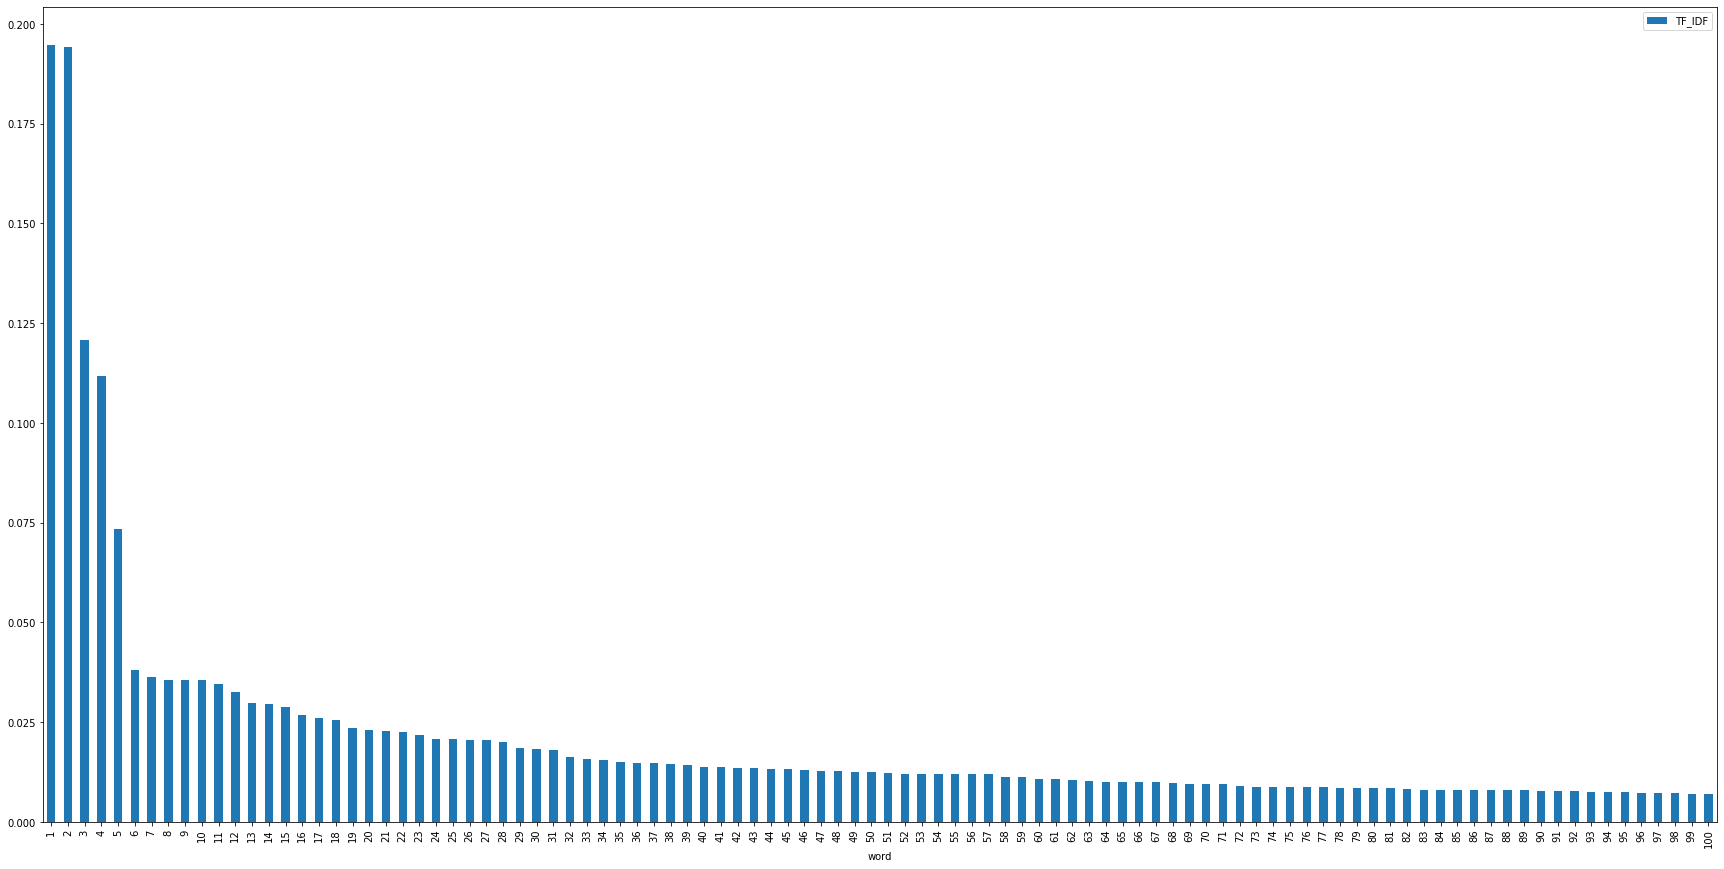

前100個高頻字詞
1 word: 八卦 frequency: 77498
2 word: 什麼 frequency: 55374
3 word: 怎麼 frequency: 31816
4 word: 台灣 frequency: 27671
5 word: 可以 frequency: 22510
6 word: 是不是 frequency: 20822
7 word: 真的 frequency: 15792
8 word: 肥宅 frequency: 13971
9 word: 知道 frequency: 13124
10 word: 自己 frequency: 13052
11 word: 不是 frequency: 11742
12 word: 就是 frequency: 10860
13 word: 還是 frequency: 10557
14 word: 不會 frequency: 10494
15 word: 一堆 frequency: 9691
16 word: 一個 frequency: 9626
17 word: 中國 frequency: 8771
18 word: 時候 frequency: 8274
19 word: 這樣 frequency: 8179
20 word: 不要 frequency: 8085
21 word: 現在 frequency: 8068
22 word: 到底 frequency: 7753
23 word: 怎樣 frequency: 7686
24 word: 有人 frequency: 7378
25 word: 沒有 frequency: 7214
26 word: 應該 frequency: 6960
27 word: 女生 frequency: 6927
28 word: 很多 frequency: 6817
29 word: 日本 frequency: 6686
30 word: 一樣 frequency: 6583
31 word: 因為 frequency: 6555
32 word: 喜歡 frequency: 6141
33 word: 這麼 frequency: 5852
34 word: 多少 frequency: 5571
35 word: 看到 frequency: 5567
36 w

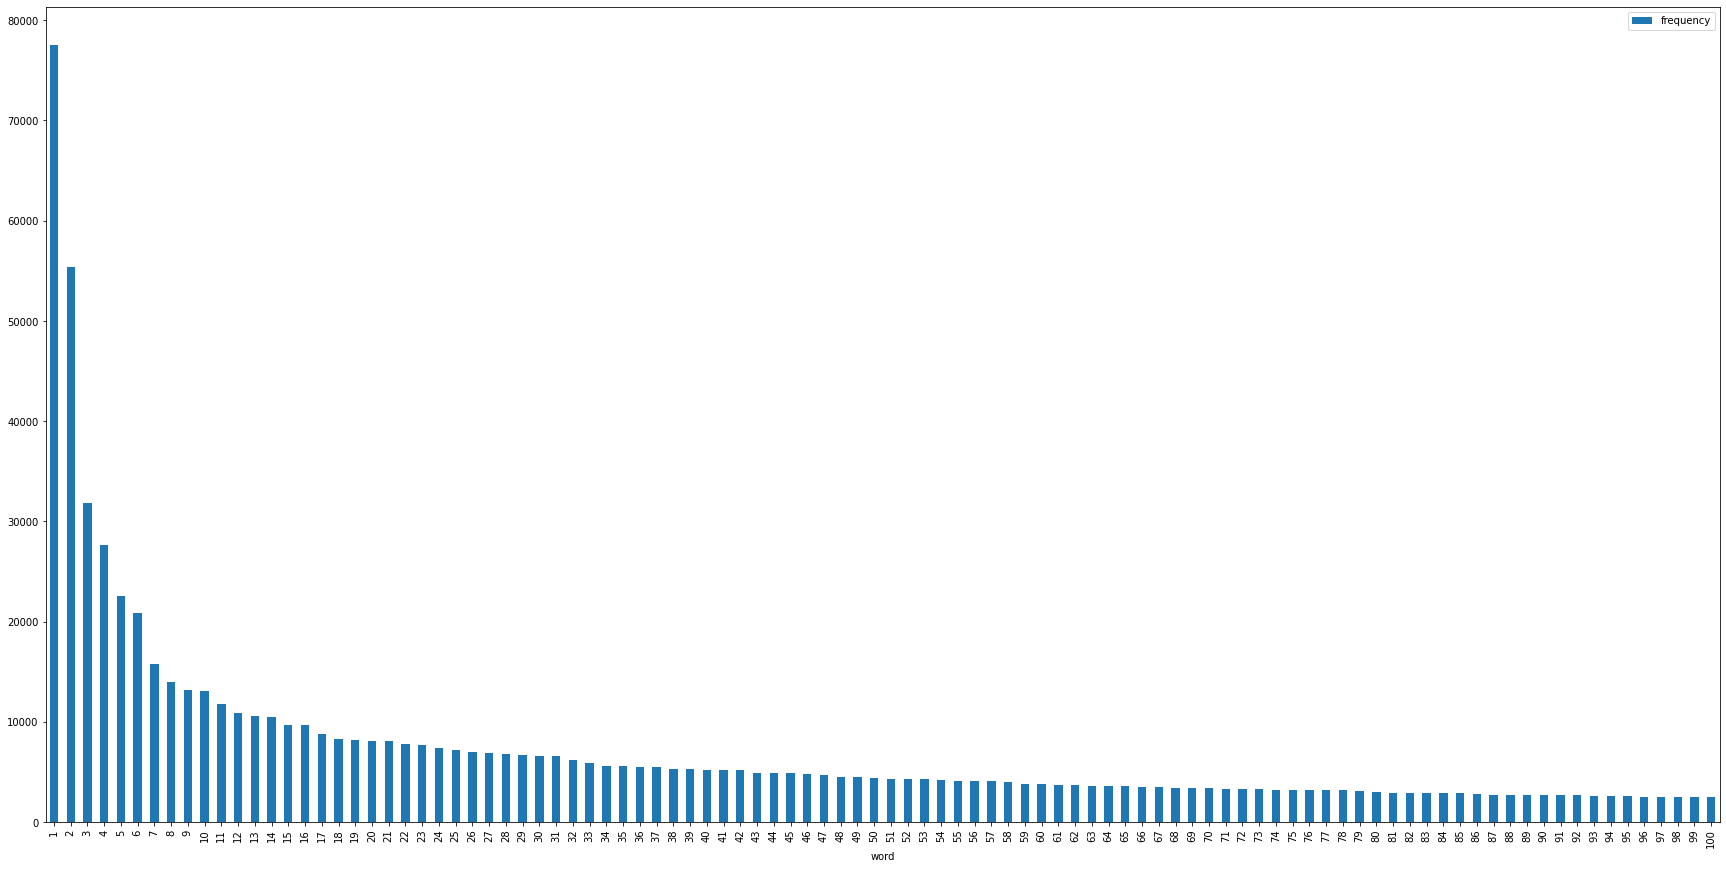

In [9]:
Words = scan()
TF_IDF()
freq=frequency(Words)

